In [1]:
import pandas as pd
import numpy as np
import nsepy
from datetime import datetime
startDate=datetime(2020, 1,1)
endDate=datetime(2022, 11, 3)

stock_df=nsepy.get_history(symbol='ULTRACEMCO',start=startDate,end=endDate)

stock_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-01,ULTRACEMCO,EQ,4046.05,4060.0,4071.95,4045.0,4068.0,4065.0,4059.12,163949,66548820129999.992188,9451,30007,0.183
2020-01-02,ULTRACEMCO,EQ,4065.0,4069.9,4256.3,4068.15,4237.0,4244.8,4201.06,1458328,612652179940000.0,94709,403142,0.2764
2020-01-03,ULTRACEMCO,EQ,4244.8,4237.0,4258.0,4185.85,4218.25,4219.2,4222.2,635983,268524907690000.0,46789,174945,0.2751
2020-01-06,ULTRACEMCO,EQ,4219.2,4191.0,4199.75,4131.0,4146.85,4157.1,4169.55,462841,192983962925000.0,39868,214991,0.4645
2020-01-07,ULTRACEMCO,EQ,4157.1,4199.55,4254.0,4164.05,4239.95,4242.1,4221.37,524372,221356719935000.0,41214,92149,0.1757


<AxesSubplot:xlabel='Date'>

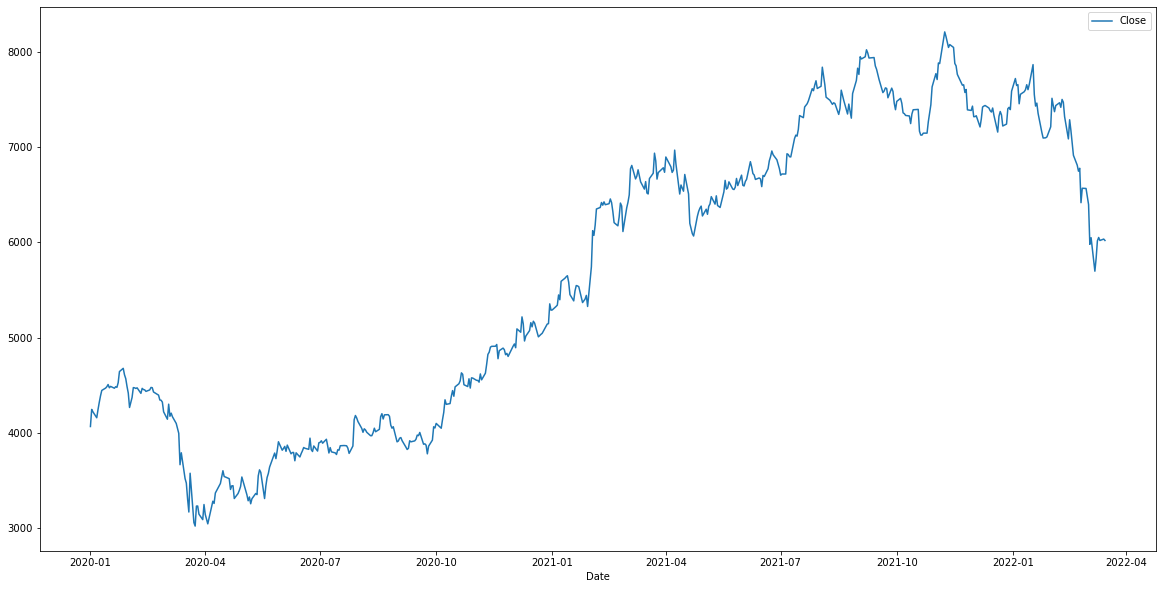

In [2]:
import matplotlib.pyplot as plt


stock_df.reset_index().plot(x='Date',y='Close',figsize=(20,10))

In [43]:
close_data=np.array(stock_df['Close'].values)
close_data[:5]

array([4065.0, 4244.8, 4219.2, 4157.1, 4242.1], dtype=object)

In [3]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler().fit(close_data.reshape(-1,1))
close_data=min_max.transform(close_data.reshape(-1,1))
close_data[:5]

array([[0.20148385],
       [0.23608772],
       [0.23116081],
       [0.21920919],
       [0.23556809]])

In [23]:
# close_data.reshape(close_data.shape[0],1)

X=list()
y=list()

for index in range(10,len(close_data),1):
    X.append(close_data[index-10:index])
    y.append(close_data[index])

In [25]:
X=np.array(X)
y=np.array(y)

for i,j in zip(X[:10],y[:10]):
    print("Input : ",i,' ----> Output :',j)

Input :  [[0.20148385]
 [0.23608772]
 [0.23116081]
 [0.21920919]
 [0.23556809]
 [0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]]  ----> Output : [0.28645387]
Input :  [[0.23608772]
 [0.23116081]
 [0.21920919]
 [0.23556809]
 [0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]
 [0.28645387]]  ----> Output : [0.27988145]
Input :  [[0.23116081]
 [0.21920919]
 [0.23556809]
 [0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]
 [0.28645387]
 [0.27988145]]  ----> Output : [0.28265284]
Input :  [[0.21920919]
 [0.23556809]
 [0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]
 [0.28645387]
 [0.27988145]
 [0.28265284]]  ----> Output : [0.2789769]
Input :  [[0.23556809]
 [0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]
 [0.28645387]
 [0.27988145]
 [0.28265284]
 [0.2789769 ]]  ----> Output : [0.28203697]
Input :  [[0.25035845]
 [0.26364765]
 [0.27454075]
 [0.27917898]
 [0.28198886]
 [0.28645387]
 [0.27988145]

In [26]:
X_train=X[:-5]
y_train=y[:-5]
X_test=X[-5:]
y_test=y[-5:]

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((535, 10, 1), (5, 10, 1), (535, 1), (5, 1))

In [40]:
test_data=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [41]:
import tensorflow as tf
import keras as ks
from keras.layers import LSTM,Dense,Bidirectional

model=ks.models.Sequential()
model.add(Bidirectional(LSTM(units=10,input_shape=(10,1),activation='relu')))

# model.add(LSTM(units=5,input_shape=(10,1),activation='relu',return_sequences=True))

# model.add(LSTM(units=5,input_shape=(10,1),activation='relu',return_sequences=True))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [42]:
model.fit(X_train,y_train,epochs=50,batch_size=10,validation_data=test_data)

Epoch 1/50
54/54 [==============================] - 7s 35ms/step - loss: 0.2769 - mse: 0.2769 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 2/50
54/54 [==============================] - 0s 7ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.1984 - val_mse: 0.1984
Epoch 3/50
54/54 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.2000 - val_mse: 0.2000
Epoch 4/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.2002 - val_mse: 0.2002
Epoch 5/50
54/54 [==============================] - 1s 9ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.2008 - val_mse: 0.2008
Epoch 6/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.2008 - val_mse: 0.2008
Epoch 7/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.2011 - val_mse: 0.2011
Epoch 8/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0017 - mse:

In [153]:
preds=model.predict(X_test)

In [156]:
preds=min_max.inverse_transform(preds)

In [157]:
100-np.mean((abs(y_test-preds)/y_test)*100)

90.75797162291057

In [60]:
y_test_plot=min_max.inverse_transform(y_test)
preds=min_max.inverse_transform(preds)

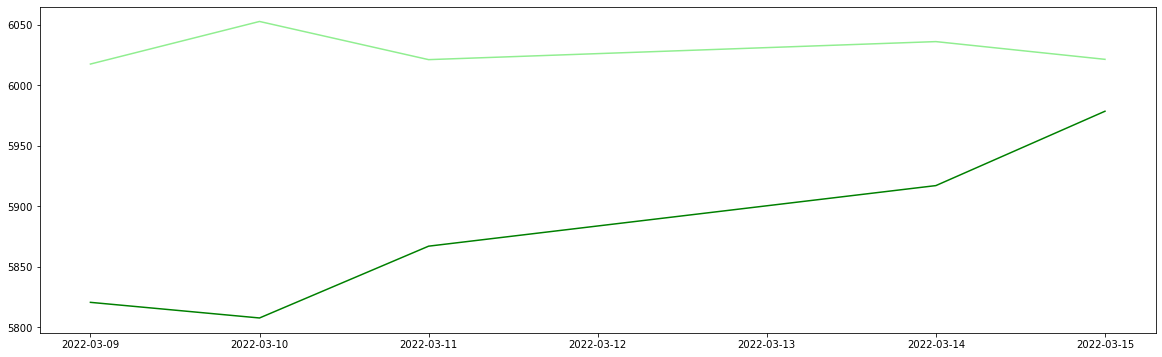

In [67]:
plt.plot(stock_df.index[-5:],y_test_plot,color='lightgreen')
plt.plot(stock_df.index[-5:],preds,color='green')
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

In [72]:
full_origional=min_max.inverse_transform(y).values
full_preds=min_max.inverse_transform(model.predict(X))

In [78]:
full_origional=full_origional.reshape((full_origional.shape[0]))
full_preds=full_preds.reshape((full_preds.shape[0]))

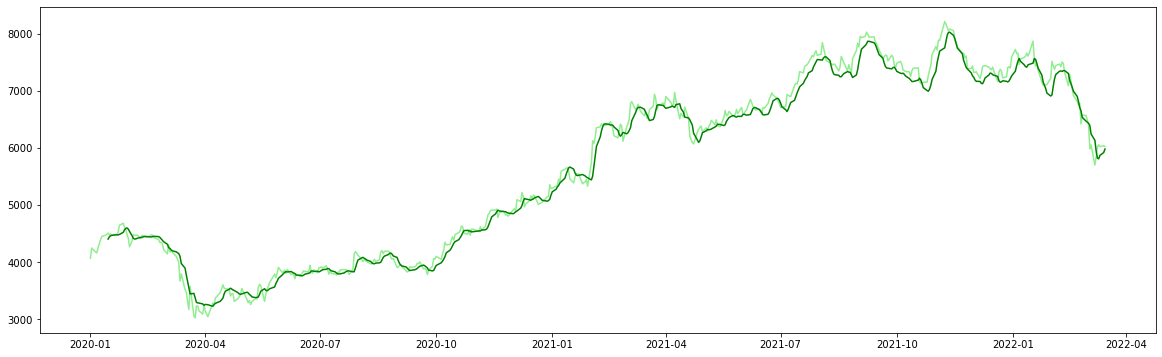

In [88]:
plt.plot(stock_df.index,stock_df.Close,color='lightgreen')
plt.plot(stock_df.index[10:],full_preds,color='green')

fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

In [91]:
model.predict(X[-1][-5:])

array([[0.15219529],
       [0.15439671],
       [0.15481849],
       [0.15444045],
       [0.15461896]], dtype=float32)

#### MultiStep Prediction

In [7]:
start=10
X=list()
y=list()
for index in range(start,len(close_data-5),5):
    X.append(close_data[index-start:index])
    y.append(close_data[index:index+5])

In [10]:
X=np.array(X)
y=np.array(y)
X.shape,y.shape

((108, 10, 1), (108, 5, 1))

In [94]:
X_train=X[:-5]
y_train=y[:-5]
X_test=X[-5:]
y_test=y[-5:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((103, 10, 1), (5, 10, 1), (103, 5, 1), (5, 5, 1))

In [146]:
import keras as ks
import tensorflow as tf

train_data=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_data=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [151]:
from keras.layers import LSTM,Dense
model=ks.models.Sequential()

model.add(ks.layers.Bidirectional(LSTM(units=10,input_shape=(10,1),activation='relu',return_sequences=True)))

# model.add(LSTM(units=10,input_shape=(10,1),activation='relu',return_sequences=True))
model.add(ks.layers.Bidirectional(LSTM(units=10,input_shape=(10,1),activation='relu')))


# model.add(LSTM(units=5,activation='relu',return_sequences=False))


model.add(Dense(units=5))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [152]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_train,y_train,batch_size=5,epochs=50)

Epoch 1/50
21/21 [==============================] - 7s 12ms/step - loss: 0.3232 - mean_squared_error: 0.3232
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.2504 - mean_squared_error: 0.2504
Epoch 3/50
21/21 [==============================] - 0s 17ms/step - loss: 0.1595 - mean_squared_error: 0.1595
Epoch 4/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 8/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 9/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 10/50
21/21 [

In [72]:
multi_preds=model.predict(X_test)
multi_preds=min_max.inverse_transform(multi_preds)
multi_preds

array([[7374.5557, 7380.7705, 7405.9233, 7352.278 , 7379.092 ],
       [7480.543 , 7471.3716, 7478.795 , 7397.329 , 7485.68  ],
       [7263.3916, 7255.6187, 7263.629 , 7190.8228, 7270.8564],
       [6887.5713, 6894.228 , 6915.243 , 6878.0693, 6895.1777],
       [6388.5083, 6409.259 , 6441.334 , 6443.4663, 6396.6875]],
      dtype=float32)

In [97]:
y_test=min_max.inverse_transform(y_test.reshape(5,5))



In [101]:
for i in range(5):
    print(100-np.mean((abs(y_test[i]-multi_preds[i])/y_test[i])*100))

98.46537926977842
94.07133125717343
90.4118188534951
84.7782985536886
93.59392486234918


In [133]:
# predicting next 5 days
to_pred=min_max.transform(close_data[-10:].reshape(-1,1)).reshape(1,10,1)

forecast=model.predict(to_pred)

min_max.inverse_transform(forecast),min_max.inverse_transform(to_pred.reshape(1,10))

(array([[6128.7646, 6170.4316, 6221.3057, 6267.553 , 6132.29  ]],
       dtype=float32),
 array([[6399.35, 5980.7 , 6050.3 , 5698.1 , 5833.45, 6017.35, 6052.55,
         6021.  , 6035.9 , 6021.25]]))

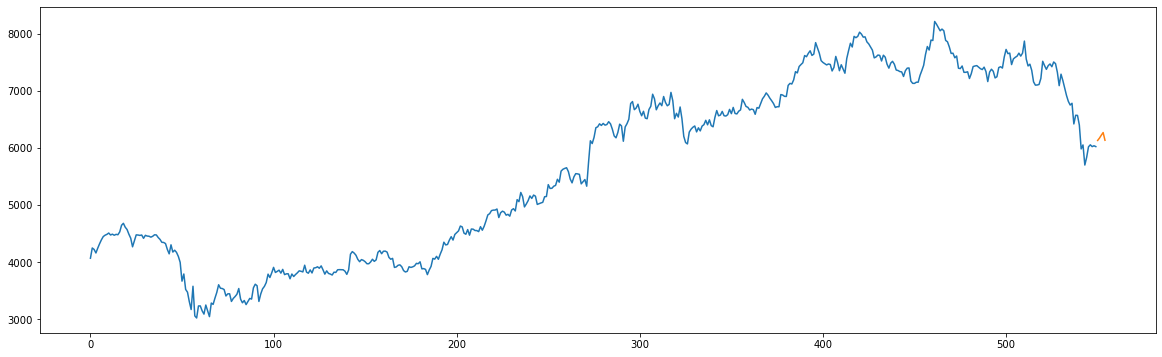

In [140]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(stock_df)),stock_df.Close)
plt.plot(range(len(stock_df),len(stock_df)+5),min_max.inverse_transform(forecast).flatten())

fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()